# Phase 4- Capstone project



### Unsupervised ML (Clustering)



#### Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.



#### Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"



4.2 Create DataFrame for each cluster that shows data according to the areas.



4.3 "Analyze your clusters and prepare a report that explains all your observations.



Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

# Importing all the needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### It is observed that the Analysis has to be done on the Data having district columns in them. Hense uploading and reading 5 dataframes having Dicstrict columns in them 

In [2]:
Women_crimes=pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
IPC_crimes=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
ST_crimes=pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
Children_crimes=pd.read_csv('03_District_wise_crimes_committed_against_children_2001_2012.csv') 
SC_crimes=pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')

In [3]:
Women_crimes

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


##### To merge the data with common columns the column names should be the same. But the dataser IPC_crimes has column as YEAR and other datasets have column name as Year. 

In [4]:
# Rename the 'YEAR' column to 'Year' in the IPC_crimes dataset
IPC_crimes.rename(columns={'YEAR': 'Year'}, inplace=True)

In [5]:
# Merge datasets on common columns
merged_df1 = pd.merge(Women_crimes, Children_crimes, on=["STATE/UT", "DISTRICT", "Year"], how="inner")
merged_df2 = pd.merge(merged_df1, ST_crimes, on=["STATE/UT", "DISTRICT", "Year"], how="inner")
merged_df3 = pd.merge(merged_df2, IPC_crimes, on=["STATE/UT", "DISTRICT", "Year"], how="inner")
df = pd.merge(merged_df3, SC_crimes, on=["STATE/UT", "DISTRICT", "Year"], how="inner")

In [6]:
df

,STATE/UT,DISTRICT,Year,Rape_x,Kidnapping and Abduction_x,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,...,Murder,Rape_y,Kidnapping and Abduction,Dacoity_y,Robbery_y,Arson_y,Hurt_y,Prevention of atrocities (POA) Act_y,Protection of Civil Rights (PCR) Act_y,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,...,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8818,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8819,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8820,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0,...,1,0,0,0,0,0,0,1,20,1


# Exploratory DAta Analysis

In [7]:
df.head()

,STATE/UT,DISTRICT,Year,Rape_x,Kidnapping and Abduction_x,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,...,Murder,Rape_y,Kidnapping and Abduction,Dacoity_y,Robbery_y,Arson_y,Hurt_y,Prevention of atrocities (POA) Act_y,Protection of Civil Rights (PCR) Act_y,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,...,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,...,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,...,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,...,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,...,1,3,0,0,0,0,3,12,63,7


In [8]:
df.tail()

,STATE/UT,DISTRICT,Year,Rape_x,Kidnapping and Abduction_x,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,...,Murder,Rape_y,Kidnapping and Abduction,Dacoity_y,Robbery_y,Arson_y,Hurt_y,Prevention of atrocities (POA) Act_y,Protection of Civil Rights (PCR) Act_y,Other Crimes Against SCs
8817,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8818,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8819,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8820,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0,...,1,0,0,0,0,0,0,1,20,1
8821,PUDUCHERRY,TOTAL,2012,13,16,0,9,2,6,0,...,2,0,0,0,0,0,0,1,20,1


In [9]:
df.shape

(8822, 72)

In [10]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape_x', 'Kidnapping and Abduction_x',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Murder_x', 'Rape_y',
       'Kidnapping and Abduction_y', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total',
       'Murder_y', 'Rape_x', 'Kidnapping Abduction', 'Dacoity_x', 'Robbery_x',
       'Arson_x', 'Hurt_x', 'Protection of Civil Rights (PCR) Act_x',
       'Prevention of atrocities (POA) Act_x', 'Other Crimes Against STs',
       'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOME

### We can see that some of the columns havve been repeating here so we need to concatenatee them as well first. 

In [11]:
# Identify and sum duplicate columns Prevention of atrocities (POA) Act_x' and 'Prevention of atrocities (POA) Act_y'
if 'Prevention of atrocities (POA) Act_x' in df.columns and 'Prevention of atrocities (POA) Act_y' in df.columns:
    df['Prevention of atrocities (POA) Act'] = df['Prevention of atrocities (POA) Act_y'].fillna(0) + df['Prevention of atrocities (POA) Act_x'].fillna(0)
    df.drop(['Prevention of atrocities (POA) Act_y', 'Prevention of atrocities (POA) Act_x'], axis=1, inplace=True)

In [12]:
# Identify and sum duplicate columns 'Protection of Civil Rights (PCR) Act_x' and 'Protection of Civil Rights (PCR) Act_y'
if 'Protection of Civil Rights (PCR) Act_x' in df.columns and 'Protection of Civil Rights (PCR) Act_y' in df.columns:
    df['Protection of Civil Rights (PCR) Act'] = df['Protection of Civil Rights (PCR) Act_x'].fillna(0) + df['Protection of Civil Rights (PCR) Act_y'].fillna(0)
    df.drop(['Protection of Civil Rights (PCR) Act_x', 'Protection of Civil Rights (PCR) Act_y'], axis=1, inplace=True)

In [13]:
# Identify and sum duplicate columns 'Arson_x' and 'Arson_y'
if 'Arson_x' in df.columns and 'Arson_y' in df.columns:
    df['Arson'] = df['Arson_x'].fillna(0) + df['Arson_y'].fillna(0)+df['ARSON'].fillna(0)
    df.drop(['Arson_x', 'Arson_y','ARSON'], axis=1, inplace=True)

In [14]:
# Identify and sum duplicate columns 'Robbery_x' and 'Robbery_y'
if 'Robbery_x' in df.columns and 'Robbery_y' in df.columns:
    df['Robbery'] = df['Robbery_x'].fillna(0) + df['Robbery_y'].fillna(0)+df['ROBBERY'].fillna(0)+df['BURGLARY'].fillna(0)+df['THEFT'].fillna(0)
    df.drop(['Robbery_x', 'Robbery_y','ROBBERY','AUTO THEFT','OTHER THEFT','BURGLARY','THEFT'], axis=1, inplace=True)

In [15]:
# Identify and sum the specified columns for Kidnapping and Abduction
kidnap_columns = [
    'Kidnapping and Abduction_x', 'Kidnapping and Abduction_y', 
    'Kidnapping Abduction', 'KIDNAPPING & ABDUCTION', 'Kidnapping and Abduction'
]

# Create a new column 'Kidnapping and Abduction' by summing the specified columns
df['Kidnapping_Abduction'] = df[kidnap_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(kidnap_columns, axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8822 entries, 0 to 8821
Data columns (total 58 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             8822 non-null   object 
 1   DISTRICT                                             8822 non-null   object 
 2   Year                                                 8822 non-null   int64  
 3   Rape_x                                               8822 non-null   int64  
 4   Dowry Deaths                                         8822 non-null   int64  
 5   Assault on women with intent to outrage her modesty  8822 non-null   int64  
 6   Insult to modesty of Women                           8822 non-null   int64  
 7   Cruelty by Husband or his Relatives                  8822 non-null   int64  
 8   Importation of Girls                                 8822 non-null  

In [17]:
df.drop(['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS'], axis=1, inplace=True)

In [18]:
# Identify and sum the specified columns for Murder
Murder_columns = [
    'Murder_x', 'Murder_y', 
    'MURDER', 'Murder']

# Create a new column 'Murder' by summing the specified columns
df['Murders'] = df[Murder_columns].sum(axis=1, skipna=True)

# Drop the original duplicate columns
df.drop(Murder_columns, axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8822 entries, 0 to 8821
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             8822 non-null   object 
 1   DISTRICT                                             8822 non-null   object 
 2   Year                                                 8822 non-null   int64  
 3   Rape_x                                               8822 non-null   int64  
 4   Dowry Deaths                                         8822 non-null   int64  
 5   Assault on women with intent to outrage her modesty  8822 non-null   int64  
 6   Insult to modesty of Women                           8822 non-null   int64  
 7   Cruelty by Husband or his Relatives                  8822 non-null   int64  
 8   Importation of Girls                                 8822 non-null  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8822 entries, 0 to 8821
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             8822 non-null   object 
 1   DISTRICT                                             8822 non-null   object 
 2   Year                                                 8822 non-null   int64  
 3   Rape_x                                               8822 non-null   int64  
 4   Dowry Deaths                                         8822 non-null   int64  
 5   Assault on women with intent to outrage her modesty  8822 non-null   int64  
 6   Insult to modesty of Women                           8822 non-null   int64  
 7   Cruelty by Husband or his Relatives                  8822 non-null   int64  
 8   Importation of Girls                                 8822 non-null  

In [21]:
df.drop(['ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], axis=1, inplace=True)

In [22]:
# Identify and sum the specified columns for Dowry Death
Dowry_columns = ['Dowry Deaths', 'DOWRY DEATHS']
# Create a new column 'Dowry_Death' by summing the specified columns
df['Dowry_Death'] = df[Dowry_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Dowry_columns, axis=1, inplace=True)

# Identify and sum the specified columns for Dacoity
Dacoity_columns = ['Dacoity_x', 'Dacoity_y','DACOITY']
# Create a new column 'Dacoity' by summing the specified columns
df['Dacoity'] = df[Dacoity_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Dacoity_columns, axis=1, inplace=True)

In [23]:
# Identify and sum the specified columns for Rape
Rape_columns = ['Rape_x', 'Rape_y', 'RAPE']
# Create a new column 'Rape' by summing the specified columns
df['Rape'] = df[Rape_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Rape_columns, axis=1, inplace=True)

In [24]:
df.drop(['CUSTODIAL RAPE','OTHER RAPE'], axis=1, inplace=True)

In [25]:
# Identify and sum the specified columns for Women_Assault
Women_Assault_columns = ['Assault on women with intent to outrage her modesty', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']
# Create a new column 'Women_Assault' by summing the specified columns
df['Women_Assault'] = df[Women_Assault_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Women_Assault_columns, axis=1, inplace=True)

In [26]:
# Identify and sum the specified columns for Women_insult
Women_insult_columns = ['Insult to modesty of Women', 'INSULT TO MODESTY OF WOMEN','Cruelty by Husband or his Relatives', 'CRUELTY BY HUSBAND OR HIS RELATIVES']
# Create a new column 'Women_insult' by summing the specified columns
df['Women_insult'] = df[Women_insult_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Women_insult_columns, axis=1, inplace=True)

In [27]:
# Identify and sum the specified columns for Prostitution
Prostitution_columns = ['Importation of Girls', 'Exposure and abandonment','Procuration of minor girls', 'Buying of girls for prostitution',
       'Selling of girls for prostitution','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']
# Create a new column 'Prostitution' by summing the specified columns
df['Prostitution'] = df[Prostitution_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Prostitution_columns, axis=1, inplace=True)

In [28]:
# Identify and sum the specified columns for Hurt
Hurt_columns = ['Hurt_x', 'Hurt_y','HURT/GREVIOUS HURT']
# Create a new column 'Hurt' by summing the specified columns
df['Hurt'] = df[Hurt_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(Hurt_columns, axis=1, inplace=True)

In [29]:
# Identify and sum the specified columns for WomenCrimes
WomenCrimes_columns = ['Dowry_Death', 'Women_Assault','Women_insult','Prostitution']
# Create a new column 'WomenCrimes' by summing the specified columns
df['Women Crimes'] = df[WomenCrimes_columns].sum(axis=1, skipna=True)
# Drop the original duplicate columns
df.drop(WomenCrimes_columns, axis=1, inplace=True)

In [30]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Foeticide', 'Abetment of suicide',
       'Prohibition of child marriage act', 'Other Crimes', 'Total',
       'Other Crimes Against STs', 'PREPARATION AND ASSEMBLY FOR DACOITY',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Other Crimes Against SCs', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Arson', 'Robbery',
       'Kidnapping_Abduction', 'Murders', 'Dacoity', 'Rape', 'Hurt',
       'Women Crimes'],
      dtype='object')

In [31]:
# All the columns that donot seems to be of use or are the total of all the crimes have been dropped
df.drop(['Foeticide', 'Abetment of suicide','Prohibition of child marriage act', 'Other Crimes',
         'Total','PREPARATION AND ASSEMBLY FOR DACOITY','CAUSING DEATH BY NEGLIGENCE','TOTAL IPC CRIMES'], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8822 entries, 0 to 8821
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   STATE/UT                              8822 non-null   object 
 1   DISTRICT                              8822 non-null   object 
 2   Year                                  8822 non-null   int64  
 3   Other Crimes Against STs              8822 non-null   int64  
 4   RIOTS                                 8822 non-null   int64  
 5   CRIMINAL BREACH OF TRUST              8822 non-null   int64  
 6   CHEATING                              8822 non-null   int64  
 7   COUNTERFIETING                        8822 non-null   int64  
 8   OTHER IPC CRIMES                      8822 non-null   int64  
 9   Other Crimes Against SCs              8822 non-null   int64  
 10  Prevention of atrocities (POA) Act    8822 non-null   int64  
 11  Protection of Civ

### OBSERVATIONS:
1. There are 3 columns with Float datatype, 14 columns with int datatype, and 2 columns with object datatype.
2. There is no null value and most of the columns were merged. 

In [33]:
df.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Other Crimes Against STs                0
RIOTS                                   0
CRIMINAL BREACH OF TRUST                0
CHEATING                                0
COUNTERFIETING                          0
OTHER IPC CRIMES                        0
Other Crimes Against SCs                0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Arson                                   0
Robbery                                 0
Kidnapping_Abduction                    0
Murders                                 0
Dacoity                                 0
Rape                                    0
Hurt                                    0
Women Crimes                            0
dtype: int64

- Just to confirm if there is any null values. We donot find any null value in the dataset now. 

<Axes: >

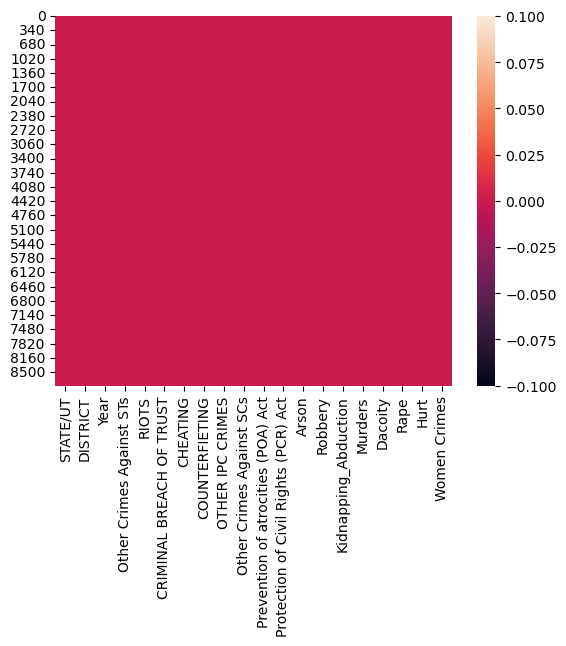

In [34]:
sns.heatmap(df.isnull()) # we can cleaerly visualize that there is no null value present

In [35]:
# checking the value counts of each column
for i in df.columns:
    print (df[i].value_counts())
    print('\n')

UTTAR PRADESH        877
MADHYA PRADESH       627
MAHARASHTRA          552
BIHAR                539
TAMIL NADU           468
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                360
JAMMU & KASHMIR      326
PUNJAB               313
JHARKHAND            311
WEST BENGAL          309
HARYANA              266
CHHATTISGARH         257
KERALA               230
ARUNACHAL PRADESH    195
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             145
MANIPUR              125
MIZORAM              108
MEGHALAYA             95
TRIPURA               67
SIKKIM                60
GOA                   36
A & N ISLANDS         36
DAMAN & DIU           36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: STATE/UT, dtype: int64


TOTAL              413
G.R.P.              46
RAILWAYS            37
NORTH               25
SOUTH               25
    

#### The the column 'District' we can observe that 'Total' has occured multiple times, which is the total of that particular State. hense we will have to remove it. 

In [36]:
df['DISTRICT'].value_counts()

TOTAL              413
G.R.P.              46
RAILWAYS            37
NORTH               25
SOUTH               25
                  ... 
RAILWAYS KMR         1
G.R.P. AJMER         1
G.R.P. JODHPUR       1
A and N ISLANDS      1
CAR                  1
Name: DISTRICT, Length: 785, dtype: int64

In [37]:
## Getting the index values of the 'TOTAL' rows
print(list(np.where(df["DISTRICT"]=='TOTAL')))

[array([  28,   42,   69,  114,  135,  166,  185,  199,  226,  250,  282,
        299,  348,  394,  404,  412,  421,  432,  467,  492,  526,  531,
        570,  575,  647,  661,  685,  688,  690,  692,  695,  697,  699,
        728,  742,  770,  815,  835,  838,  869,  890,  904,  929,  954,
        986, 1003, 1052, 1098, 1108, 1116, 1125, 1136, 1171, 1196, 1230,
       1235, 1273, 1278, 1350, 1364, 1390, 1393, 1395, 1397, 1400, 1402,
       1404, 1434, 1450, 1478, 1522, 1543, 1546, 1577, 1598, 1612, 1637,
       1662, 1694, 1711, 1762, 1808, 1818, 1825, 1834, 1845, 1880, 1905,
       1939, 1944, 1981, 1986, 2057, 2071, 2097, 2100, 2102, 2104, 2107,
       2109, 2111, 2141, 2157, 2185, 2230, 2251, 2254, 2285, 2306, 2320,
       2345, 2370, 2402, 2422, 2474, 2520, 2530, 2538, 2547, 2558, 2593,
       2617, 2651, 2656, 2695, 2700, 2772, 2786, 2812, 2815, 2817, 2819,
       2822, 2824, 2826, 2856, 2872, 2903, 2948, 2970, 2973, 3004, 3026,
       3040, 3065, 3090, 3122, 3142, 3194, 3240, 3

##### dropping all the rows with District named as 'TOTAL'

In [38]:
df.drop([28,   42,   69,  114,  135,  166,  185,  199,  226,  250,  282,
        299,  348,  394,  404,  412,  421,  432,  467,  492,  526,  531,
        570,  575,  647,  661,  685,  688,  690,  692,  695,  697,  699,
        728,  742,  770,  815,  835,  838,  869,  890,  904,  929,  954,
        986, 1003, 1052, 1098, 1108, 1116, 1125, 1136, 1171, 1196, 1230,
       1235, 1273, 1278, 1350, 1364, 1390, 1393, 1395, 1397, 1400, 1402,
       1404, 1434, 1450, 1478, 1522, 1543, 1546, 1577, 1598, 1612, 1637,
       1662, 1694, 1711, 1762, 1808, 1818, 1825, 1834, 1845, 1880, 1905,
       1939, 1944, 1981, 1986, 2057, 2071, 2097, 2100, 2102, 2104, 2107,
       2109, 2111, 2141, 2157, 2185, 2230, 2251, 2254, 2285, 2306, 2320,
       2345, 2370, 2402, 2422, 2474, 2520, 2530, 2538, 2547, 2558, 2593,
       2617, 2651, 2656, 2695, 2700, 2772, 2786, 2812, 2815, 2817, 2819,
       2822, 2824, 2826, 2856, 2872, 2903, 2948, 2970, 2973, 3004, 3026,
       3040, 3065, 3090, 3122, 3142, 3194, 3240, 3250, 3258, 3267, 3278,
       3279, 3280, 3281, 3282, 3283, 3284, 3285, 3320, 3345, 3379, 3384,
       3422, 3427, 3499, 3513, 3539, 3542, 3544, 3546, 3549, 3551, 3553,
       3583, 3599, 3630, 3675, 3697, 3700, 3731, 3754, 3768, 3793, 3818,
       3850, 3870, 3922, 3968, 3978, 3986, 3995, 4006, 4041, 4067, 4106,
       4111, 4149, 4154, 4226, 4240, 4265, 4268, 4270, 4272, 4275, 4277,
       4280, 4310, 4326, 4357, 4402, 4424, 4427, 4458, 4481, 4495, 4520,
       4547, 4579, 4599, 4651, 4697, 4707, 4715, 4724, 4736, 4771, 4797,
       4836, 4841, 4879, 4884, 4956, 4970, 4995, 4997, 4999, 5001, 5004,
       5006, 5009, 5039, 5055, 5086, 5131, 5150, 5153, 5185, 5208, 5222,
       5250, 5277, 5311, 5330, 5384, 5430, 5441, 5449, 5458, 5470, 5507,
       5533, 5573, 5578, 5617, 5622, 5695, 5709, 5734, 5737, 5739, 5741,
       5744, 5746, 5749, 5779, 5796, 5871, 5890, 5893, 5925, 5948, 5964,
       5993, 6020, 6054, 6073, 6127, 6173, 6184, 6192, 6201, 6213, 6250,
       6276, 6316, 6321, 6362, 6367, 6440, 6454, 6479, 6482, 6484, 6486,
       6489, 6491, 6494, 6528, 6546, 6577, 6622, 6643, 6646, 6679, 6702,
       6718, 6749, 6776, 6811, 6830, 6884, 6930, 6941, 6949, 6958, 6970,
       7007, 7034, 7075, 7080, 7121, 7127, 7201, 7215, 7240, 7243, 7245,
       7247, 7250, 7252, 7255, 7289, 7307, 7338, 7383, 7406, 7409, 7444,
       7467, 7483, 7513, 7540, 7576, 7597, 7651, 7697, 7708, 7716, 7725,
       7737, 7774, 7803, 7845, 7850, 7890, 7896, 7973, 7987, 8013, 8016,
       8018, 8020, 8023, 8025, 8028, 8062, 8080, 8113, 8158, 8187, 8190,
       8225, 8249, 8265, 8296, 8323, 8359, 8380, 8434, 8480, 8491, 8499,
       8508, 8520, 8557, 8586, 8629, 8634, 8674, 8684, 8761, 8775, 8805,
       8809, 8811, 8813, 8816, 8818, 8821], axis=0, inplace=True)

In [39]:
#restting the df back 
df.reset_index(drop = True)

,STATE/UT,DISTRICT,Year,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes
0,ANDHRA PRADESH,ADILABAD,2001,13,78,16,104,1,1518,32,0,15,30,438,82.0,101.0,9,102.0,1136,748.0
1,ANDHRA PRADESH,ANANTAPUR,2001,6,168,11,65,8,754,53,22,0,69,573,112.0,170.0,8,62.0,1599,606.0
2,ANDHRA PRADESH,CHITTOOR,2001,0,156,33,209,9,1262,34,36,0,38,974,93.0,104.0,4,57.0,2128,790.0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,164,12,37,2,1181,25,54,0,23,275,45.0,80.0,1,43.0,817,476.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,14,70,50,220,3,2313,7,12,63,41,1483,75.0,83.0,4,49.0,1247,852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,0,6,6,7,0,34,0,0,0,10,79,4.0,3.0,1,14.0,15,2.0
8405,DAMAN & DIU,DIU,2012,0,3,0,1,0,12,0,0,0,1,5,1.0,0.0,0,0.0,2,4.0
8406,LAKSHADWEEP,LAKSHADWEEP,2012,0,10,0,0,0,32,0,0,0,3,10,0.0,0.0,0,0.0,3,4.0
8407,PUDUCHERRY,KARAIKAL,2012,0,17,1,15,1,392,0,0,0,1,105,6.0,6.0,0,15.0,186,7.0


# Moving further for Descritive Statistics

In [40]:
df.describe()

,Year,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes
count,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000,8409.000000
mean,2006.631942,3.935783,91.837793,21.302771,88.073731,3.111785,1135.059103,18.977643,16.533357,0.553574,13.822571,547.214651,77.784873,50.160423,7.071114,64.360209,404.644785,362.409323
std,3.463790,10.943867,138.400670,37.150165,184.964107,8.192636,1440.584350,42.452046,33.123373,4.237341,30.850317,969.419075,100.796930,45.533659,11.141548,70.651560,569.602718,489.494086
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,11.000000,3.000000,12.000000,0.000000,257.000000,0.000000,0.000000,0.000000,2.000000,143.000000,18.000000,19.000000,1.000000,18.000000,44.000000,74.000000
50%,2007.000000,0.000000,46.000000,11.000000,34.000000,1.000000,709.000000,2.000000,2.000000,0.000000,8.000000,314.000000,46.000000,40.000000,3.000000,44.000000,197.000000,224.000000
75%,2010.000000,2.000000,119.000000,25.000000,89.000000,3.000000,1513.000000,19.000000,18.000000,0.000000,19.000000,613.000000,101.000000,68.000000,9.000000,89.000000,513.000000,464.000000
max,2012.000000,323.000000,3181.000000,589.000000,3155.000000,170.000000,32452.000000,819.000000,469.000000,161.000000,2350.000000,16666.000000,1335.000000,543.000000,219.000000,1136.000000,4837.000000,7282.000000


### OBSERVATIONS: 
1. Mean is greater than Median in all thee columns. hense the data is right or positvely skewed data and we will have to treat them. 
2. Outliers exists in all the columns as there is a huge difference between 75%(Quartile 3). and MAX.
3. We can alsso observe the Standard Deviation and the minimum values. 

#### From the above we can observe the minimum values , Moderate values and Maximum values. This will help us to understand the Districts falling in peacefull areas , Moderate areas and Sensitive areas.  

# Let us move further in finding Clusters. 

#### To find Clusters we will have to group the states and Districts in order to get a proper data and sum of all the years for particular state and District

In [41]:
df=df.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)
df

,STATE/UT,DISTRICT,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes
0,A & N ISLANDS,A and N ISLANDS,1,17,7,23,1,337,0,0,0,11,211,28.0,15.0,5,9.0,99,84.0
1,A & N ISLANDS,ANDAMAN,23,115,57,196,9,3638,0,5,0,80,1689,187.0,126.0,4,247.0,911,615.0
2,A & N ISLANDS,CAR,0,0,0,2,0,8,0,0,0,0,4,3.0,2.0,1,0.0,4,2.0
3,A & N ISLANDS,NICOBAR,3,0,3,3,0,117,0,0,0,3,46,1.0,13.0,1,4.0,34,18.0
4,A & N ISLANDS,NORTH,0,0,0,3,0,70,0,0,0,0,20,0.0,6.0,0,12.0,8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,2,920,64,376,1,7976,5,4,0,24,2853,477.0,734.0,63,1004.0,205,4970.0
797,WEST BENGAL,SEALDAH G.R.P.,0,128,17,94,9,549,0,0,0,0,3096,103.0,188.0,18,38.0,247,160.0
798,WEST BENGAL,SILIGURI G.R.P.,0,26,3,6,3,413,0,0,0,0,1170,56.0,42.0,13,5.0,0,76.0
799,WEST BENGAL,SILIGURI_PC,7,9,53,195,0,385,0,0,0,3,881,248.0,37.0,3,43.0,812,840.0


# Normalization

#### Normalize the numerical columns in the merged dataset to ensure all features contribute equally to the clustering process.

In [42]:
#Using Min max Scaler 

from sklearn.preprocessing import MinMaxScaler

# Normalize the numerical columns
columns_to_normalize = df.columns[2:]  # Excluding STATE/UT, DISTRICT
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [43]:
df1=df[columns_to_normalize] 
df1

,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes
0,0.001838,0.001733,0.001761,0.000871,0.001295,0.002714,0.000000,0.000000,0.0,0.004427,0.001597,0.004444,0.003221,0.005236,0.001302,0.002091,0.001979
1,0.042279,0.011726,0.014343,0.007424,0.011658,0.029297,0.000000,0.002860,0.0,0.032193,0.012782,0.029683,0.027056,0.004188,0.035745,0.019239,0.014488
2,0.000000,0.000000,0.000000,0.000076,0.000000,0.000064,0.000000,0.000000,0.0,0.000000,0.000030,0.000476,0.000429,0.001047,0.000000,0.000084,0.000047
3,0.005515,0.000000,0.000755,0.000114,0.000000,0.000942,0.000000,0.000000,0.0,0.001207,0.000348,0.000159,0.002791,0.001047,0.000579,0.000718,0.000424
4,0.000000,0.000000,0.000000,0.000114,0.000000,0.000564,0.000000,0.000000,0.0,0.000000,0.000151,0.000000,0.001288,0.000000,0.001737,0.000169,0.000236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.003676,0.093811,0.016105,0.014242,0.001295,0.064231,0.001206,0.002288,0.0,0.009658,0.021590,0.075714,0.157612,0.065969,0.145297,0.004329,0.117079
797,0.000000,0.013052,0.004278,0.003560,0.011658,0.004421,0.000000,0.000000,0.0,0.000000,0.023429,0.016349,0.040369,0.018848,0.005499,0.005216,0.003769
798,0.000000,0.002651,0.000755,0.000227,0.003886,0.003326,0.000000,0.000000,0.0,0.000000,0.008854,0.008889,0.009019,0.013613,0.000724,0.000000,0.001790
799,0.012868,0.000918,0.013337,0.007386,0.000000,0.003100,0.000000,0.000000,0.0,0.001207,0.006667,0.039365,0.007945,0.003141,0.006223,0.017148,0.019788


In [44]:
#Using Standard Scaler Method 

from sklearn.preprocessing import StandardScaler
columns_normalize = df.columns[2:]  # Excluding STATE/UT, DISTRICT
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df[columns_normalize])
print(df_scaled)
df2 = pd.DataFrame(df_scaled)
df2

[[-0.45787737 -0.72662651 -0.60283746 ... -0.90729119 -0.71262787
  -0.75085947]
 [-0.20803328 -0.6514417  -0.46370349 ... -0.58338581 -0.57316003
  -0.64369817]
 [-0.46923392 -0.73966877 -0.62231622 ... -0.91953971 -0.72894492
  -0.76740792]
 ...
 [-0.46923392 -0.71972178 -0.61396818 ... -0.91273498 -0.72963196
  -0.75247395]
 [-0.38973807 -0.73276404 -0.47483421 ... -0.86101899 -0.59016411
  -0.59829084]
 [-0.37838152 -0.2156767  -0.29396004 ...  1.43625951  0.16402716
   0.87674101]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.457877,-0.726627,-0.602837,-0.490108,-0.479711,-0.796985,-0.498917,-0.633713,-0.223169,-0.770198,-0.570396,-0.821937,-1.003221,-0.650847,-0.907291,-0.712628,-0.750859
1,-0.208033,-0.651442,-0.463703,-0.396067,-0.358526,-0.569776,-0.498917,-0.615458,-0.223169,-0.373932,-0.418049,-0.656214,-0.785552,-0.660248,-0.583386,-0.573160,-0.643698
2,-0.469234,-0.739669,-0.622316,-0.501524,-0.494860,-0.819630,-0.498917,-0.633713,-0.223169,-0.833370,-0.591733,-0.847994,-1.028714,-0.688450,-0.919540,-0.728945,-0.767408
3,-0.435164,-0.739669,-0.613968,-0.500980,-0.494860,-0.812128,-0.498917,-0.633713,-0.223169,-0.816141,-0.587404,-0.850078,-1.007143,-0.688450,-0.914096,-0.723792,-0.764179
4,-0.469234,-0.739669,-0.622316,-0.500980,-0.494860,-0.815363,-0.498917,-0.633713,-0.223169,-0.833370,-0.590084,-0.851121,-1.020870,-0.697851,-0.903208,-0.728258,-0.765793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.446521,-0.033852,-0.444225,-0.298220,-0.479711,-0.271191,-0.486396,-0.619109,-0.223169,-0.695539,-0.298069,-0.353953,0.406727,-0.105603,0.446851,-0.694421,0.235186
797,-0.469234,-0.641468,-0.575011,-0.451513,-0.358526,-0.782393,-0.498917,-0.633713,-0.223169,-0.833370,-0.273021,-0.743766,-0.663971,-0.528637,-0.867824,-0.687208,-0.735522
798,-0.469234,-0.719722,-0.613968,-0.499349,-0.449415,-0.791754,-0.498917,-0.633713,-0.223169,-0.833370,-0.471546,-0.792753,-0.950275,-0.575641,-0.912735,-0.729632,-0.752474
799,-0.389738,-0.732764,-0.474834,-0.396610,-0.494860,-0.793681,-0.498917,-0.633713,-0.223169,-0.816141,-0.501335,-0.592635,-0.960080,-0.669648,-0.861019,-0.590164,-0.598291


## 4.1  Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

#### Using a clustering algorithm such as K-Means to create three clusters (Sensitive Areas, Moderate Areas, Peaceful Areas).

In [45]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df1)

# Create DataFrames for each cluster
sensitive_areas = df[df['Cluster'] == 2]
moderate_areas = df[df['Cluster'] == 1]
peaceful_areas = df[df['Cluster'] == 0]

# Display the first few rows of each cluster
print("Sensitive Areas:")
print(sensitive_areas.head())

print("Moderate Areas:")
print(moderate_areas.head())

print("Peaceful Areas:")
print(peaceful_areas.head())

Sensitive Areas:
          STATE/UT       DISTRICT  Other Crimes Against STs     RIOTS  \
6   ANDHRA PRADESH       ADILABAD                  0.284926  0.103599   
11  ANDHRA PRADESH  EAST GODAVARI                  0.284926  0.078311   
13  ANDHRA PRADESH         GUNTUR                  0.389706  0.122769   
16  ANDHRA PRADESH     KARIMNAGAR                  0.426471  0.205058   
17  ANDHRA PRADESH        KHAMMAM                  0.597426  0.169981   

    CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  OTHER IPC CRIMES  \
6                   0.063915  0.073179        0.042746          0.165724   
11                  0.270760  0.123973        0.291451          0.145866   
13                  0.150478  0.160524        0.277202          0.232992   
16                  0.136135  0.213590        0.080311          0.163139   
17                  0.094112  0.081095        0.089378          0.154925   

    Other Crimes Against SCs  Prevention of atrocities (POA) Act  \
6                  

## 4.2  Create DataFrame for each cluster that shows data according to the areas.

# Sensitive Areas

In [46]:
sensitive_areas

,STATE/UT,DISTRICT,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes,Cluster
6,ANDHRA PRADESH,ADILABAD,0.284926,0.103599,0.063915,0.073179,0.042746,0.165724,0.083675,0.118993,0.1000,0.160161,0.050854,0.225556,0.260468,0.075393,0.222576,0.347968,0.346455,2
11,ANDHRA PRADESH,EAST GODAVARI,0.284926,0.078311,0.270760,0.123973,0.291451,0.145866,0.192187,0.280892,0.9150,0.194366,0.142626,0.195238,0.232768,0.031414,0.166425,0.672707,0.407044,2
13,ANDHRA PRADESH,GUNTUR,0.389706,0.122769,0.150478,0.160524,0.277202,0.232992,0.237521,0.164188,0.0250,0.283702,0.128807,0.320794,0.400687,0.095288,0.199132,0.480909,0.526784,2
16,ANDHRA PRADESH,KARIMNAGAR,0.426471,0.205058,0.136135,0.213590,0.080311,0.163139,0.366048,0.726545,0.0825,0.277666,0.084696,0.552857,0.379644,0.098429,0.321997,0.674861,0.664122,2
17,ANDHRA PRADESH,KHAMMAM,0.597426,0.169981,0.094112,0.081095,0.089378,0.154925,0.111406,0.192792,0.0150,0.177465,0.067487,0.307143,0.298046,0.065969,0.265123,0.386531,0.428057,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,RAJASTHAN,PALI,0.545956,0.044866,0.077755,0.137116,0.032383,0.298955,0.477454,0.305492,0.0000,0.105030,0.050385,0.318095,0.106936,0.008377,0.152967,0.012122,0.240660,2
620,RAJASTHAN,SAWAI MADHOPUR,0.799632,0.029877,0.023905,0.089088,0.006477,0.211788,0.223053,0.132151,0.0000,0.062374,0.048152,0.226032,0.063131,0.006283,0.080318,0.005343,0.107892,2
621,RAJASTHAN,SIKAR,0.615809,0.226471,0.036487,0.188629,0.011658,0.213834,0.359296,0.029176,0.0000,0.162978,0.053351,0.251111,0.131415,0.009424,0.136903,0.097208,0.135642,2
623,RAJASTHAN,TONK,0.520221,0.114510,0.036236,0.093974,0.007772,0.114660,0.146371,0.471968,0.0000,0.058350,0.037005,0.246032,0.059266,0.005236,0.074096,0.295764,0.154111,2


#### We find 68 Districts where the areas are quite sensitive.

# Moderate Areas

In [47]:
moderate_areas 

,STATE/UT,DISTRICT,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes,Cluster
0,A & N ISLANDS,A and N ISLANDS,0.001838,0.001733,0.001761,0.000871,0.001295,0.002714,0.000000,0.000000,0.0,0.004427,0.001597,0.004444,0.003221,0.005236,0.001302,0.002091,0.001979,1
1,A & N ISLANDS,ANDAMAN,0.042279,0.011726,0.014343,0.007424,0.011658,0.029297,0.000000,0.002860,0.0,0.032193,0.012782,0.029683,0.027056,0.004188,0.035745,0.019239,0.014488,1
2,A & N ISLANDS,CAR,0.000000,0.000000,0.000000,0.000076,0.000000,0.000064,0.000000,0.000000,0.0,0.000000,0.000030,0.000476,0.000429,0.001047,0.000000,0.000084,0.000047,1
3,A & N ISLANDS,NICOBAR,0.005515,0.000000,0.000755,0.000114,0.000000,0.000942,0.000000,0.000000,0.0,0.001207,0.000348,0.000159,0.002791,0.001047,0.000579,0.000718,0.000424,1
4,A & N ISLANDS,NORTH,0.000000,0.000000,0.000000,0.000114,0.000000,0.000564,0.000000,0.000000,0.0,0.000000,0.000151,0.000000,0.001288,0.000000,0.001737,0.000169,0.000236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,0.003676,0.093811,0.016105,0.014242,0.001295,0.064231,0.001206,0.002288,0.0,0.009658,0.021590,0.075714,0.157612,0.065969,0.145297,0.004329,0.117079,1
797,WEST BENGAL,SEALDAH G.R.P.,0.000000,0.013052,0.004278,0.003560,0.011658,0.004421,0.000000,0.000000,0.0,0.000000,0.023429,0.016349,0.040369,0.018848,0.005499,0.005216,0.003769,1
798,WEST BENGAL,SILIGURI G.R.P.,0.000000,0.002651,0.000755,0.000227,0.003886,0.003326,0.000000,0.000000,0.0,0.000000,0.008854,0.008889,0.009019,0.013613,0.000724,0.000000,0.001790,1
799,WEST BENGAL,SILIGURI_PC,0.012868,0.000918,0.013337,0.007386,0.000000,0.003100,0.000000,0.000000,0.0,0.001207,0.006667,0.039365,0.007945,0.003141,0.006223,0.017148,0.019788,1


#### There are 586 Districts with average or Moderate crimes 

# Peaceful Areas

In [48]:
peaceful_areas

,STATE/UT,DISTRICT,Other Crimes Against STs,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,OTHER IPC CRIMES,Other Crimes Against SCs,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Arson,Robbery,Kidnapping_Abduction,Murders,Dacoity,Rape,Hurt,Women Crimes,Cluster
7,ANDHRA PRADESH,ANANTAPUR,0.205882,0.131845,0.060393,0.054733,0.147668,0.127730,0.114299,0.437643,0.0500,0.186318,0.067049,0.253333,0.427958,0.143455,0.095369,0.383764,0.210624,0
8,ANDHRA PRADESH,CHITTOOR,0.000000,0.099215,0.088072,0.102042,0.221503,0.197905,0.148300,0.201945,0.0150,0.171831,0.106407,0.255714,0.289457,0.100524,0.129667,0.293588,0.334747,0
9,ANDHRA PRADESH,CUDDAPAH,0.091912,0.135210,0.084550,0.071740,0.062176,0.177112,0.180130,0.173913,0.0200,0.137223,0.046805,0.241746,0.268843,0.040838,0.118379,0.312447,0.197032,0
10,ANDHRA PRADESH,CYBERABAD,0.207721,0.057000,0.295420,0.432673,0.113990,0.190866,0.081987,0.636728,0.2225,0.200805,0.320721,0.371905,0.402405,0.151832,0.203907,0.695050,0.656254,0
15,ANDHRA PRADESH,HYDERABAD CITY,0.042279,0.247986,0.317061,0.852392,0.402850,0.229231,0.095250,0.497712,0.0675,0.174245,0.533846,0.372857,0.320807,0.126702,0.243126,1.000000,0.868080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,WEST BENGAL,MALDA,0.016544,0.066687,0.017363,0.016249,0.423575,0.116238,0.000482,0.004005,0.0000,0.018913,0.033176,0.383810,0.190037,0.064921,0.385673,0.070895,0.261272,0
792,WEST BENGAL,MURSHIDABAD,0.009191,0.320485,0.089331,0.042612,0.363990,0.139504,0.001929,0.003432,0.0000,0.099799,0.063098,0.940317,0.358815,0.159162,1.000000,0.393901,1.000000,0
793,WEST BENGAL,NADIA,0.000000,0.249414,0.081530,0.059392,0.141192,0.191527,0.000000,0.000000,0.0000,0.061569,0.091371,0.781746,0.291175,0.250262,0.505210,0.307041,0.636184,0
794,WEST BENGAL,PASCHIM MIDNAPUR,0.009191,0.340267,0.102667,0.018674,0.050518,0.137152,0.000723,0.001144,0.0025,0.100604,0.039677,0.256984,0.289886,0.234555,0.204631,0.027433,0.300165,0


#### We find only 147 Districts with Peace and lower crime rates

## 4.3  "Analyze your clusters and prepare a report that explains all your observations.

### Q 4.3.1. What is impacting more crimes in sensitive areas. 

In [49]:
sensitive_reg=sensitive_areas.reset_index().drop(['index'],axis=1).head(50)

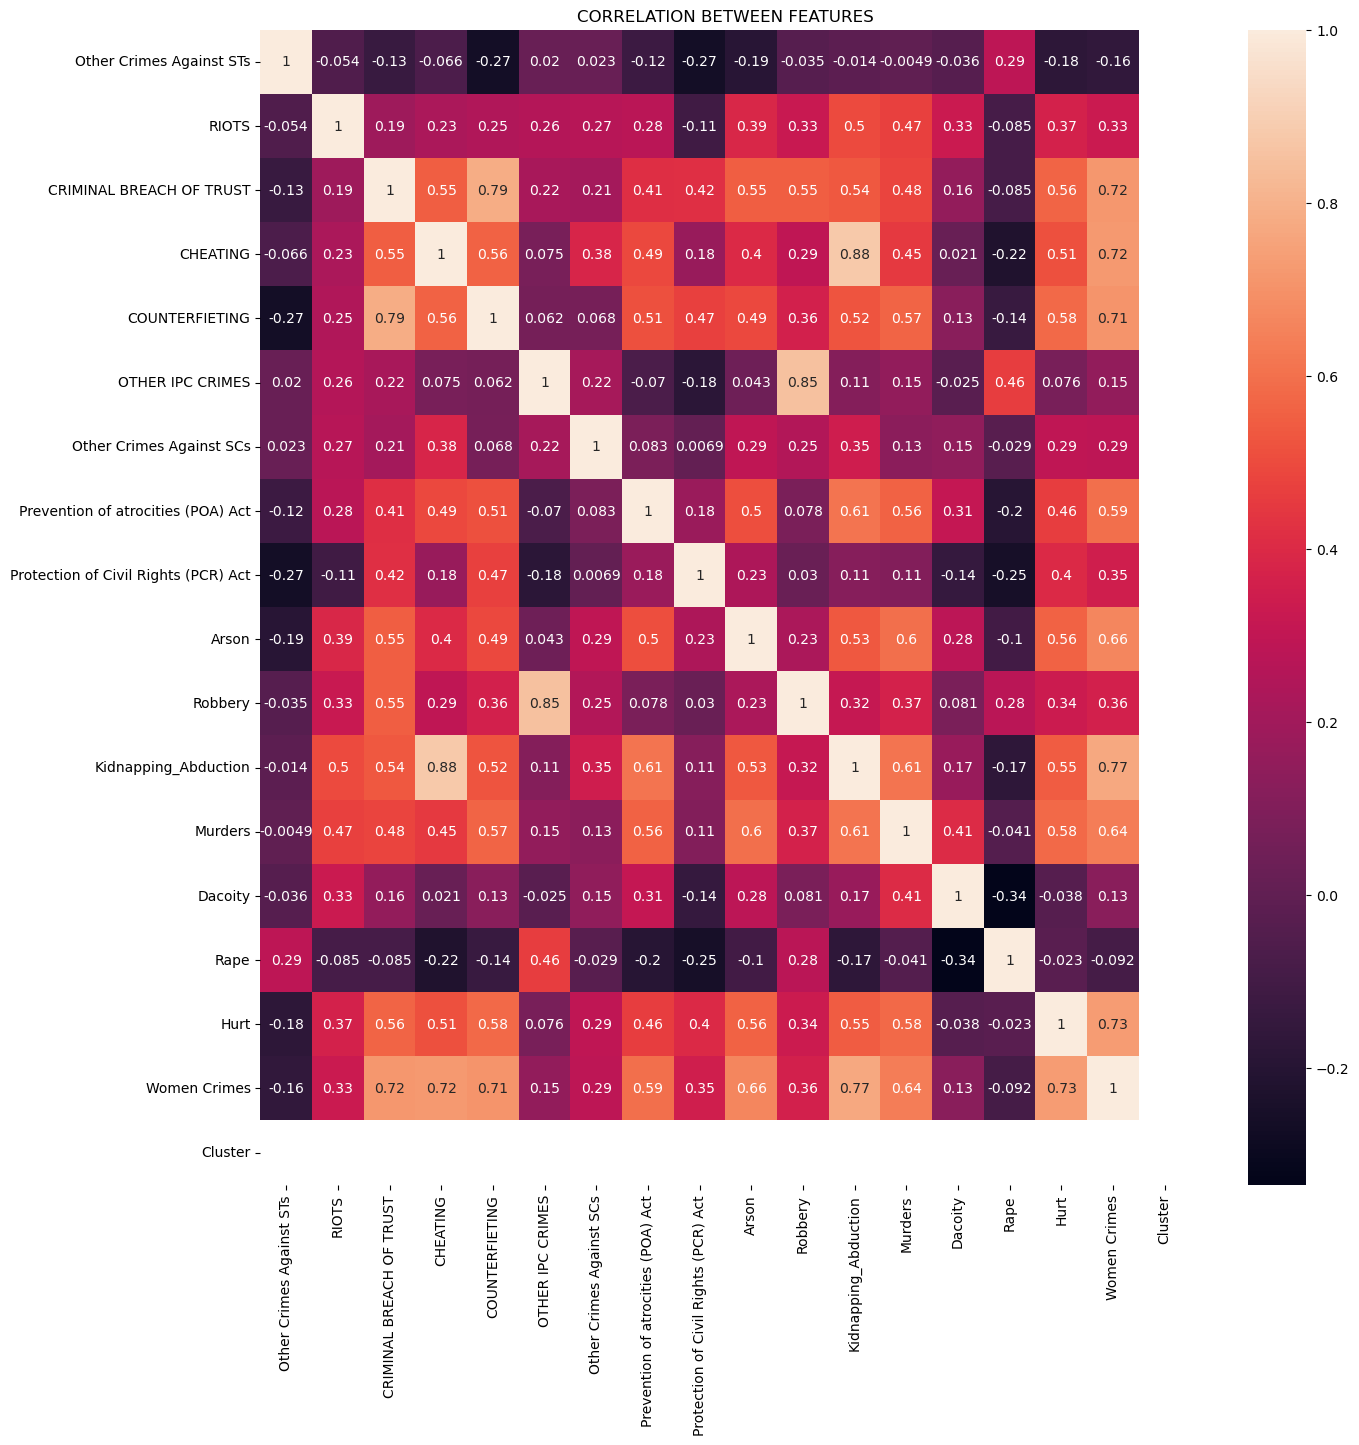

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("CORRELATION BETWEEN FEATURES")
plt.show()

### OBSERVATIONS :
1. 'Criminal Breach of Trust' is correlated to 'Cheating', Counterfiting, and moderately correlated to 'Robbery', 'Arson, 'Kidnapping', 'Murder'. 
2. 'Robbery' is highly correlated to'OTHER IPC CRIMES'. 
3. Kindnapping and Abduction is highly correlated to almost all the variables. 
4. Other Crimes against SC's,Other Crimes against ST's, Prevention of Atrocities (POA) Act, Arson has no correlation with any feature. 
5. 'Women Crimes' are most correlated to all the variables. 
6. Rest of the Columns are moderately correlated. 

### 4.3.2. What needs to be done to reduce crime?

#### Reducing crime in India is a complex challenge that requires a collaborative effort from various sectors, including the government, law enforcement, civil society organizations, and the general public. Here are some strategies to help reduce crime in India:

1. Raise Public Awareness
- Educating people about the consequences of crime and the importance of reporting it is crucial. Public awareness campaigns should be conducted to inform citizens about their rights and responsibilities, encouraging a proactive approach to crime prevention.

2. Improve Community Policing
- Building trust between the police and the community is essential for effective crime prevention and investigation. Community policing initiatives should be strengthened, with police working closely with local communities to identify and address specific issues.

3. Use Technology
- Modern technology can significantly enhance crime prevention and investigation efforts. The government should invest in equipping law enforcement agencies with advanced tools such as CCTV cameras, drones, and digital forensics to improve their efficiency and effectiveness.

4. Address Socio-Economic Factors
- Socio-economic issues such as poverty, unemployment, and lack of education significantly contribute to crime. The government should implement measures to tackle these problems by creating job opportunities, improving access to education, and ensuring basic amenities like water, electricity, and healthcare are available to all.

5. Strengthen Law Enforcement
- The government should allocate more resources and funding to law enforcement agencies to enhance their ability to prevent and investigate crimes. Police reforms are essential to make the police force more accountable, efficient, and effective.

6. Address Socio-Economic Factors
- Socio-economic issues such as poverty, unemployment, and lack of education significantly contribute to crime. The government should implement measures to tackle these problems by creating job opportunities, improving access to education, and ensuring basic amenities like water, electricity, and healthcare are available to all.

7. Strengthen the Justice System
- India's justice system is often slow and inefficient, causing frustration and disillusionment among the public. To address this, steps should be taken to streamline the justice system and make it more responsive to people's needs. This includes speeding up legal processes and improving the efficiency of courts to ensure timely justice.


8. Reform the prison system
- The prison system in India is overcrowded and inhumane, which can lead to the further radicalization of inmates. The government needs to take steps to improve the conditions in prisons and provide inmates with access to education and vocational training.

# Q 4.3.3. Most safe and unsafe districts

### Most Safe Districts

In [51]:
# List of crime-related columns to sort by (example columns, replace with actual column names)
crime_columns = ['Rape', 'Kidnapping_Abduction', 'Murders',
                 'Robbery', 'Dacoity','RIOTS','CHEATING','COUNTERFIETING','Hurt', 'Women Crimes'
]

# Sort the DataFrame by crime-related columns in ascending order
sorted_peaceful_areas = peaceful_areas.sort_values(by=crime_columns, ascending=True)

# Select the top N safest districts (e.g., top 10 safest districts)
top_n_safest_districts = sorted_peaceful_areas.head(10)

# Display the top N safest districts
print("Top N Safest Districts:")
print(top_n_safest_districts[['STATE/UT', 'DISTRICT'] + crime_columns])


Top N Safest Districts:
       STATE/UT         DISTRICT      Rape  Kidnapping_Abduction   Murders  \
655  TAMIL NADU        THANJAVUR  0.030970              0.155556  0.161048   
185     GUJARAT          MEHSANA  0.031259              0.208095  0.085463   
198     GUJARAT  VADODARA COMMR.  0.032272              0.209048  0.083530   
100       BIHAR            BUXAR  0.045441              0.157619  0.150526   
307   KARNATAKA          BELLARY  0.045876              0.064444  0.141722   
180     GUJARAT         JUNAGADH  0.049059              0.243175  0.131630   
174     GUJARAT        BHAVNAGAR  0.053690              0.359206  0.153103   
131       BIHAR            SIWAN  0.054848              0.344444  0.250161   
309   KARNATAKA          BIJAPUR  0.056440              0.094127  0.175435   
637  TAMIL NADU       DHARMAPURI  0.058755              0.181111  0.148808   

      Robbery   Dacoity     RIOTS  CHEATING  COUNTERFIETING      Hurt  \
655  0.072527  0.029319  0.129907  0.017840 

In [52]:
top_n_safest_districts[['STATE/UT', 'DISTRICT'] + crime_columns]

,STATE/UT,DISTRICT,Rape,Kidnapping_Abduction,Murders,Robbery,Dacoity,RIOTS,CHEATING,COUNTERFIETING,Hurt,Women Crimes
655,TAMIL NADU,THANJAVUR,0.030970,0.155556,0.161048,0.072527,0.029319,0.129907,0.017840,0.047927,0.195852,0.064264
185,GUJARAT,MEHSANA,0.031259,0.208095,0.085463,0.079308,0.203141,0.110431,0.026287,0.112694,0.197563,0.142850
198,GUJARAT,VADODARA COMMR.,0.032272,0.209048,0.083530,0.158972,0.115183,0.184154,0.074732,0.103627,0.081369,0.117032
100,BIHAR,BUXAR,0.045441,0.157619,0.150526,0.031542,0.318325,0.231365,0.022537,0.016839,0.079553,0.044994
307,KARNATAKA,BELLARY,0.045876,0.064444,0.141722,0.042628,0.054450,0.273274,0.027272,0.041451,0.131357,0.076985
180,GUJARAT,JUNAGADH,0.049059,0.243175,0.131630,0.069849,0.105759,0.108902,0.026022,0.177461,0.128991,0.263746
174,GUJARAT,BHAVNAGAR,0.053690,0.359206,0.153103,0.095987,0.166492,0.178036,0.039506,0.275907,0.058097,0.159976
131,BIHAR,SIWAN,0.054848,0.344444,0.250161,0.035068,0.392670,0.260528,0.028332,0.041451,0.104198,0.063086
309,KARNATAKA,BIJAPUR,0.056440,0.094127,0.175435,0.026645,0.063874,0.363720,0.026476,0.019430,0.165041,0.109352
637,TAMIL NADU,DHARMAPURI,0.058755,0.181111,0.148808,0.029688,0.063874,0.237993,0.015946,0.054404,0.245079,0.063958


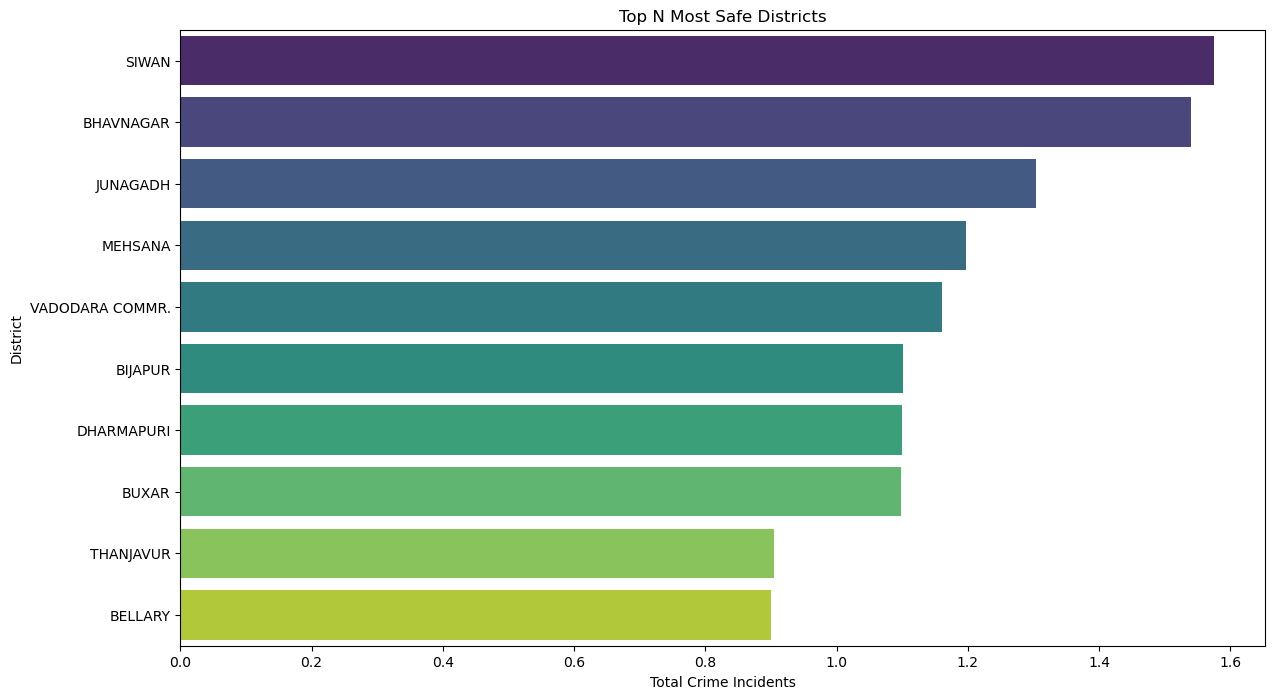

In [53]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))

# Sum the crime columns to get a total crime score for each district
top_n_safest_districts['Total_Crime'] = top_n_safest_districts[crime_columns].sum(axis=1)

# Create a bar plot
sns.barplot(
    x='Total_Crime', 
    y='DISTRICT', 
    data=top_n_safest_districts.sort_values(by='Total_Crime', ascending=False), 
    palette='viridis'
)

# Add titles and labels
plt.title('Top N Most Safe Districts')
plt.xlabel('Total Crime Incidents')
plt.ylabel('District')

# Show plot
plt.show()


# Siwan is the Most Safest District followed by Bhavnagar. 

### Most Unsafe Districts

In [54]:
# List of crime-related columns to sort by (example columns, replace with actual column names)
crime_columns = ['Rape', 'Kidnapping_Abduction', 'Murders',
                 'Robbery', 'Dacoity','RIOTS','CHEATING','COUNTERFIETING','Hurt', 'Women Crimes'
]

# Sort the DataFrame by crime-related columns in descending order
sorted_sensitive_areas = sensitive_areas.sort_values(by=crime_columns, ascending=False)

# Select the top N most unsafe districts (e.g., top 10 most unsafe districts)
top_n_most_unsafe_districts = sorted_sensitive_areas.head(10)

# Display the top N most unsafe districts
print("Top N Most Unsafe Districts:")
print(top_n_most_unsafe_districts[['STATE/UT', 'DISTRICT'] + crime_columns])


Top N Most Unsafe Districts:
           STATE/UT    DISTRICT      Rape  Kidnapping_Abduction   Murders  \
158    CHHATTISGARH      RAIPUR  0.598698              0.194762  0.263045   
370  MADHYA PRADESH       BETUL  0.596961              0.100317  0.179085   
404  MADHYA PRADESH       SAGAR  0.529957              0.186508  0.228259   
143    CHHATTISGARH        DURG  0.502894              0.178413  0.209792   
372  MADHYA PRADESH      BHOPAL  0.492619              0.220476  0.196908   
388  MADHYA PRADESH    JABALPUR  0.447612              0.145873  0.233627   
376  MADHYA PRADESH  CHHINDWARA  0.446599              0.068889  0.190681   
417  MADHYA PRADESH     VIDISHA  0.420550              0.078571  0.141937   
386  MADHYA PRADESH      INDORE  0.410999              0.187619  0.324458   
380  MADHYA PRADESH        DHAR  0.390738              0.148730  0.221602   

      Robbery   Dacoity     RIOTS  CHEATING  COUNTERFIETING      Hurt  \
158  0.173562  0.076440  0.142755  0.059278       

In [55]:
top_n_most_unsafe_districts[['STATE/UT', 'DISTRICT'] + crime_columns]

,STATE/UT,DISTRICT,Rape,Kidnapping_Abduction,Murders,Robbery,Dacoity,RIOTS,CHEATING,COUNTERFIETING,Hurt,Women Crimes
158,CHHATTISGARH,RAIPUR,0.598698,0.194762,0.263045,0.173562,0.076440,0.142755,0.059278,0.191710,0.420426,0.221461
370,MADHYA PRADESH,BETUL,0.596961,0.100317,0.179085,0.034599,0.011518,0.014683,0.010189,0.006477,0.107070,0.138610
404,MADHYA PRADESH,SAGAR,0.529957,0.186508,0.228259,0.087579,0.018848,0.125523,0.016401,0.003886,0.675980,0.329776
143,CHHATTISGARH,DURG,0.502894,0.178413,0.209792,0.131169,0.048168,0.071582,0.047498,0.090674,0.111928,0.226549
372,MADHYA PRADESH,BHOPAL,0.492619,0.220476,0.196908,0.288839,0.050262,0.121240,0.070944,0.080311,0.277496,0.253545
388,MADHYA PRADESH,JABALPUR,0.447612,0.145873,0.233627,0.140446,0.019895,0.115938,0.049695,0.051813,0.747592,0.293380
376,MADHYA PRADESH,CHHINDWARA,0.446599,0.068889,0.190681,0.041682,0.014660,0.065260,0.017764,0.001295,0.322331,0.200919
417,MADHYA PRADESH,VIDISHA,0.420550,0.078571,0.141937,0.051739,0.038743,0.083104,0.015416,0.000000,0.196296,0.179694
386,MADHYA PRADESH,INDORE,0.410999,0.187619,0.324458,0.415739,0.076440,0.164780,0.067725,0.076425,0.434596,0.409658
380,MADHYA PRADESH,DHAR,0.390738,0.148730,0.221602,0.071930,0.078534,0.094728,0.013712,0.001295,0.161387,0.179788


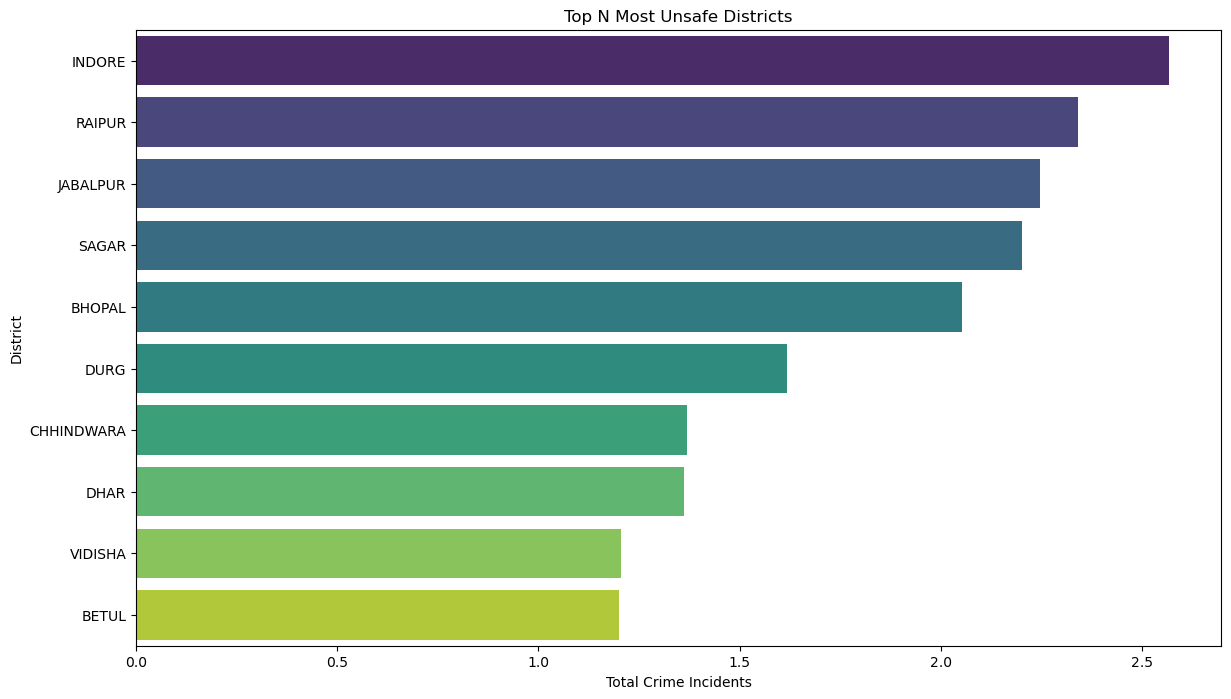

In [57]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))

# Sum the crime columns to get a total crime score for each district
top_n_most_unsafe_districts['Total_Crime'] = top_n_most_unsafe_districts[crime_columns].sum(axis=1)

# Create a bar plot
sns.barplot(
    x='Total_Crime', 
    y='DISTRICT', 
    data=top_n_most_unsafe_districts.sort_values(by='Total_Crime', ascending=False), 
    palette='viridis'
)

# Add titles and labels
plt.title('Top N Most Unsafe Districts')
plt.xlabel('Total Crime Incidents')
plt.ylabel('District')

# Show plot
plt.show()

# Indore seems to be thee most Unsafe place follwed by Raipur. 

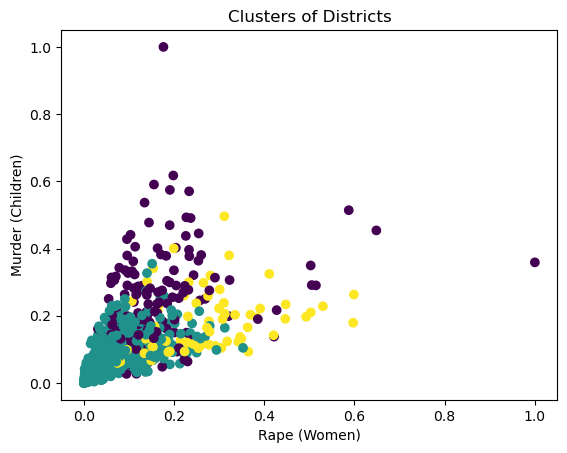

In [58]:
# Visualizing the clusters 
plt.scatter(df['Rape'], df['Murders'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Rape (Women)')
plt.ylabel('Murder (Children)')
plt.title('Clusters of Districts')
plt.show()

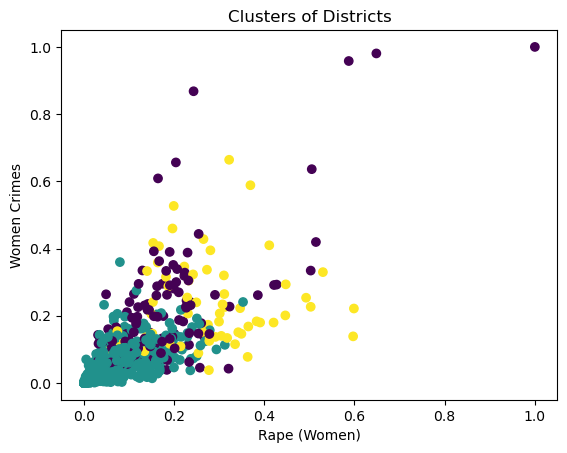

In [59]:
# Visualizing the clusters 
plt.scatter(df['Rape'], df['Women Crimes'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Rape (Women)')
plt.ylabel('Women Crimes')
plt.title('Clusters of Districts')
plt.show()

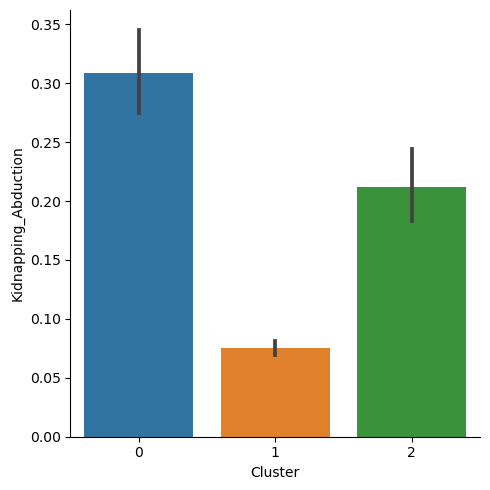

In [61]:
sns.catplot(x='Cluster', y='Kidnapping_Abduction', data=df, kind='bar');
plt.savefig('clustercatplot.jpg')

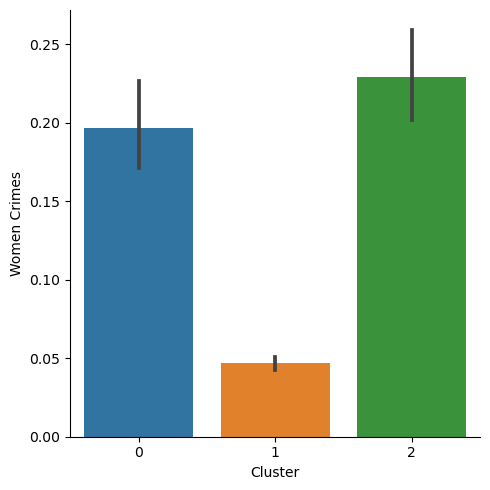

In [63]:
sns.catplot(x='Cluster', y='Women Crimes', data=df, kind='bar');
plt.savefig('clustercatplot.jpg')

# Q 4.3.4 Capstone project overall story in your own words. Min 1000 words.

### India, with its population of over 1.4 billion, faces significant crime-related challenges. In 2011, the National Crime Records Bureau (NCRB) reported a total of 2.27 million crime cases, marking a 4.54% decrease from the previous year.

##### Crimes Against Women
- Crimes against women, such as rape, sexual harassment, and domestic violence, remain a major concern. In 2011, there were 213,949 reported cases of crimes against women, with 11.04% involving rape or sexual assault. Despite stricter laws and increased public awareness, these crimes persist.

##### Crimes Against Children
- Crimes against children, including rape, kidnapping, abduction, murder, trafficking, and the importation of girls, are also pressing issues. In 2011, there were 33,049 reported cases of crimes against children. Notably, 21.51% of these cases involved rape or sexual assault, and 46.24% involved murder. Despite various laws and stricter enforcement, crimes against children increased by 254.86% from 2001 to 2011. Madhya Pradesh had the highest number of cases (40,217), followed by Uttar Pradesh (29,969) and Maharashtra (27,845). Additionally, in 2011, there were 33,718 cases recorded against Scheduled Castes (SC).

##### Juvenile Involvement in Crime
- Juvenile involvement in crime poses a serious societal threat. Often misguided, juveniles are easily influenced to engage in criminal activities. Stricter laws are needed to address this issue. In 2001, there were 23,597 cases involving juveniles, which increased to 27,471 in 2011. Madhya Pradesh had the highest number of juvenile cases (61,939), while Manipur had the least.

##### Human Rights Violations by Police
- Human rights violations by police also contribute significantly to crime statistics. The year 2009 saw the highest number of recorded cases (664). However, there was an 82.815% decrease in such cases from 2001 to 2011. Chhattisgarh had the highest number of human rights violation cases from 2001 to 2011.

##### Assaults on Law Enforcement
- Police officers often face assaults from riotous mobs, extremists, during counter-insurgency operations, and border operations. From 2001 to 2011, Uttar Pradesh recorded 2,150 cases of assaults on law enforcement, and Jammu & Kashmir reported 1,142 cases. While overall assaults increased by almost 5% from 2001 to 2011, Jammu & Kashmir saw a significant decrease in cases from 300 in 2001 to 50 in 2010, an 83.33% reduction.

##### Property Crimes
- Maharashtra, Uttar Pradesh, and Madhya Pradesh reported the highest number of combined cases of dacoity, robbery, burglary, and theft. The counts were as follows:

#### Maharashtra: 717,452 cases
#### Madhya Pradesh: 389,927 cases
#### Uttar Pradesh: 366,166 cases

##### Conclusion
Overall, while the number of reported crimes in India has increased, indicating better reporting and awareness, there are still significant challenges to address. The government must continue efforts to enhance law enforcement, raise public awareness, and tackle socio-economic factors contributing to crime.